In [56]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [57]:
## import data yang digunakan
df = pd.read_csv('https://raw.githubusercontent.com/Lite720/Tugas/main/Students_Performance_knn.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [58]:
df.shape

(1000, 8)

# DATA CLEANING

## Missing Value

In [59]:
## kita mengecek baris yang memiliki missing value, atau nilai kosong
df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                           True
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [60]:
df[df['lunch'].isna()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
6,female,group B,some college,NaN,completed,88,95,92
41,female,group C,associate's degree,NaN,none,58,73,68
53,male,group D,high school,NaN,none,88,78,75
70,female,group D,some college,NaN,completed,58,63,73
95,male,group C,associate's degree,NaN,completed,78,81,82
115,male,group C,high school,NaN,none,84,77,74
144,male,group D,some college,NaN,none,88,73,78
173,female,group C,associate's degree,NaN,none,63,67,70
188,male,group B,some high school,NaN,none,48,52,45
209,female,group B,some college,NaN,none,58,61,66


In [61]:
df['lunch'].value_counts()

standard        631
free/reduced    344
Name: lunch, dtype: int64

In [62]:
df['lunch'] = df['lunch'].replace(np.nan,"standard") #karena standard lebih banyak dari value lain
df[df['lunch'].isna()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [63]:
print(df.shape)
print(df.isna().any().any())

(1000, 8)
False


# DATA TRANSFORMATION

## Normalization

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/Lite720/Tugas/main/iris.data')
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.DataFrame(df)
df = df.drop('class',axis=1)

In [65]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width
0             4.9          3.0           1.4          0.2
1             4.7          3.2           1.3          0.2
2             4.6          3.1           1.5          0.2
3             5.0          3.6           1.4          0.2
4             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
144           6.7          3.0           5.2          2.3
145           6.3          2.5           5.0          1.9
146           6.5          3.0           5.2          2.0
147           6.2          3.4           5.4          2.3
148           5.9          3.0           5.1          1.8

[149 rows x 4 columns]


<Axes: >

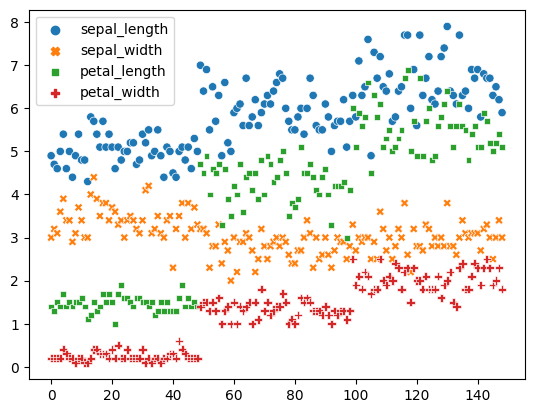

In [66]:
sns.scatterplot(df)

In [67]:
df_min_max_scaled = df.copy()
  
# proses normalization dengan upaya min-max 
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) /(df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  

In [68]:
print(df_min_max_scaled)

     sepal_length  sepal_width  petal_length  petal_width
0        0.166667     0.416667      0.067797     0.041667
1        0.111111     0.500000      0.050847     0.041667
2        0.083333     0.458333      0.084746     0.041667
3        0.194444     0.666667      0.067797     0.041667
4        0.305556     0.791667      0.118644     0.125000
..            ...          ...           ...          ...
144      0.666667     0.416667      0.711864     0.916667
145      0.555556     0.208333      0.677966     0.750000
146      0.611111     0.416667      0.711864     0.791667
147      0.527778     0.583333      0.745763     0.916667
148      0.444444     0.416667      0.694915     0.708333

[149 rows x 4 columns]


<Axes: >

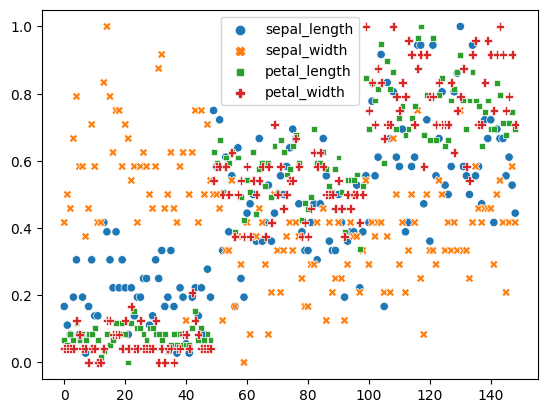

In [69]:
sns.scatterplot(df_min_max_scaled)

# DATA REDUCTION


## Numerosity Reduction

In [70]:
from sklearn.cluster import KMeans

# Generate some sample data (replace with your dataset)
data = df

# Specify the number of clusters (k) for numerosity reduction
k = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Print the centroids (representative data points)
print("Centroids (Representative Data Points):")
print(centroids)

# Perform numerosity reduction by replacing data points with their cluster centroids
cluster_labels = kmeans.predict(data)
    
# Create a reduced dataset using cluster centroids
reduced_data = centroids[cluster_labels]

# Print the reduced data
#print("\nReduced Data:")
#print(reduced_data)

Centroids (Representative Data Points):
[[5.508      2.6        3.908      1.204     ]
 [5.00408163 3.41632653 1.46530612 0.24489796]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [7.475      3.125      6.3        2.05      ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [72]:
df_reduced = pd.DataFrame(reduced_data, columns = df.columns)
df_reduced.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.004082,3.416327,1.465306,0.244898
1,5.004082,3.416327,1.465306,0.244898
2,5.004082,3.416327,1.465306,0.244898
3,5.004082,3.416327,1.465306,0.244898
4,5.004082,3.416327,1.465306,0.244898


# DATA INTEGRATION

## Integration using SQL

In [73]:
import sqlite3

In [74]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/Lite720/Tugas/main/database.sqlite","database.sqlite")

conn = sqlite3.connect('''database.sqlite''')
cur = conn.cursor()

In [75]:
cur.execute('''SELECT *
                FROM Teams_in_Matches, Unique_Teams
                LIMIT 10;''')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Match_ID,Unique_Team_ID,TeamName,Unique_Team_ID
0,1,26,Bayern Munich,1
1,1,26,Dortmund,2
2,1,26,Leverkusen,3
3,1,26,RB Leipzig,4
4,1,26,Schalke 04,5
5,1,26,M'gladbach,6
6,1,26,Wolfsburg,7
7,1,26,FC Koln,8
8,1,26,Hoffenheim,9
9,1,26,Hertha,10


In [76]:
cur.execute('''SELECT *
                FROM Teams_in_Matches, Unique_Teams
                WHERE Teams_in_Matches.Unique_Team_ID = Unique_Teams.Unique_Team_ID;''')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Match_ID,Unique_Team_ID,TeamName,Unique_Team_ID
0,1,26,Kaiserslautern,26
1,1,46,Oberhausen,46
2,2,26,Kaiserslautern,26
3,2,42,Munich 1860,42
4,3,26,Kaiserslautern,26
...,...,...,...,...
49143,46772,123,Stoke,123
49144,46773,117,West Brom,117
49145,46773,126,Swansea,126
49146,46774,85,Man City,85


In [77]:
cur.execute('''SELECT *
                FROM Teams_in_Matches
                JOIN Unique_Teams
                    ON Teams_in_Matches.Unique_Team_ID = Unique_Teams.Unique_Team_ID;''')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Match_ID,Unique_Team_ID,TeamName,Unique_Team_ID
0,1,26,Kaiserslautern,26
1,1,46,Oberhausen,46
2,2,26,Kaiserslautern,26
3,2,42,Munich 1860,42
4,3,26,Kaiserslautern,26
...,...,...,...,...
49143,46772,123,Stoke,123
49144,46773,117,West Brom,117
49145,46773,126,Swansea,126
49146,46774,85,Man City,85
